<h1 style="color: #001a79;">T-test Exercise </h1>
<h2 style="color: #001a79;">Statistics Exercise 1.2</h2>
<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

## Background

The t-distribution (also known as the student's t-distribution) is a continuous probability distributions that emerged when estimating the mean of normally distributed populations when sample size was small and population standard deviation unknown [1]. The t distribution is very similar to the normal distribution but has heavier tells, thats to say that there is a higher probability of finding values out at the tails (potential outliers). See plot below for visual difference between t-distribtions at varying degrees of freedom vs the normal (z) distribution. From the plot one can see the t kde plots more closely allign to that of the z kde plot as the degrees of freedom increases.

<br>

The T-test is typically used in hypothesis testing when comparing the means of two groups to establish how signifcant the difference (if any) between the groups of interest. As described by Mahima S (2021), some t-test assumptions need to be met to conduct a test:
- Samples should be independant random sampels from a population (no bias).
- Standard devation is unknown, if someone knew this they would typically conduct a z-test.
- Sample sizes should be low (<30) as larger sampels sizes (or degrees of freedom) tend towards a nomral distribution.

In [1]:
# import libraries

#for manipulating data
import numpy as np

# Data frames
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting
import seaborn as sns

# Mains statistics package
import scipy.stats as ss

# for normal distrubtion functions
from scipy.stats import norm

# Efficient numerical arrays
import numpy as np

# for basic math operations
import math

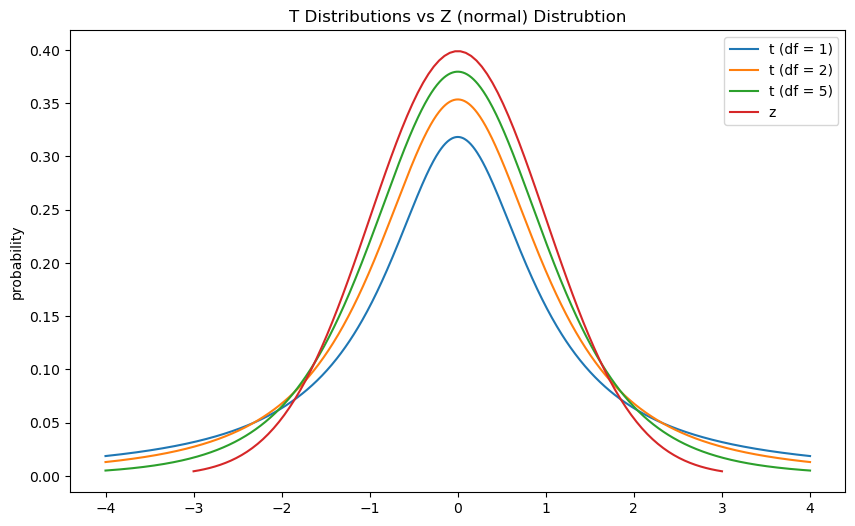

In [2]:
# get x-axis values
x_t = np.linspace(-4.0, 4.0, 1000)

# degrees of freedom for plot t curves
dflow, dfmid, dfhigh = 1, 2, 5

# leverage probability density function to return t value probabilites 
t1 = ss.t.pdf(x_t, dflow)
t2 = ss.t.pdf(x_t, dfmid)
t3 = ss.t.pdf(x_t, dfhigh)

# normal distributed code adopted from:
# https://stackoverflow.com/questions/10138085/how-to-plot-normal-distribution
mean, variance = 0, 1
sigma = math.sqrt(variance)
x = np.linspace(mean - 3 * sigma, mean + 3 * sigma, 100)

# plot code...
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_t, t1, label = 't (df = 1)')
ax.plot(x_t, t2, label = 't (df = 2)')
ax.plot(x_t, t3, label = 't (df = 5)')
plt.plot(x, ss.norm.pdf(x, mean, sigma), label = 'z')
plt.title('T Distributions vs Z (normal) Distrubtion')
plt.ylabel('probability')
plt.legend();

## Documentation:

The scipy library allows us to test if two 2 independent samples have identical average values (i.e: the Null Hypothesis = True). Lets explore the arguements and return parameters of the function and look at some data.

### Important arguments:
- ***Two value arrays*** of the same shape. 
<br>

- ***equal_var***: By Default this parameter is set to true, meaning the test will assume that each sample has equal variance. Formula 1 below shows this pooled standard deviation term (Sp). One can set equal_var to false to drop this assumption and perform the  Welch’s t-test. Welch’s test (described on [wiki](https://en.wikipedia.org/wiki/Welch%27s_t-test#:~:text=These%20tests%20are%20often%20referred,being%20compared%20are%20non%2Doverlapping.)) is typically used to test two samples whose distrubtion is not over-lapping, which makes sense as overlapping distributions are more likely to have equal variance. Formula 2 below (Welch's test) doesn't pool the estimators of the variance together, instead it divides the variance in each group by the size of the group. This difference in the formula can give one more confidence in their results as Welch's t-test performs better than the original t-test when sample sizes and variances are unequal between groups and gives the same result when sample sizes and variances are equal [3].


![t_test_eq_var](https://latex.codecogs.com/svg.latex?\Large&space;Formula1:t_{equalVar}=\frac{\bar{X_1}-\bar{X_2}}{S_p\sqrt{\frac{2}{n}})

<br>

![t_test__uneq_var](https://latex.codecogs.com/svg.latex?\Large&space;Formula2:t_{equalVar}=\frac{\bar{X_1}-\bar{X_2}}{\sqrt{\{s^2}_{\bar{X_1}}+{s^2}_{\bar{X_2}})

$\bar{X_1}$ = Mean of sample 1 <br> <br>
$\bar{X_2}$ = Mean of sample 2 <br> <br>
$\bar{S_p}$ = Pooled standard deviation<br> <br>
$S_{\bar{X}}$ = Standard Error<br> <br>


<br><br>

- ***Permutations***: By default this calculates the p-value by comparing the t-value to a theoretical t-distribution. It is this use of a theoretical distrubtion that makes this method a parametric one. A non-parametric method can be invoked by setting permutations to a value. Although more computionally heavy this method does not make strong assumptions about the data's underlying distribution. It works by pooling the data before randomly assigning it to two groups and calculating the t-statsitic. This process is repeated to generate a t-statistic distribution which is used to determine a corresponding p-value for an observed t-statistic.
- ***Trim***: One can perform Yuen's test by setting the Trim parameter to nonzero. This test is similar to the Welch method except for the use of winsorized means in the calculation. This will limit the effect that outliers have on the t-distribution, with "trimmed tails" at each side of the distribution. This would in effect minimise outliar data contaminating the calculated p-value.

## Plotting Examples 

In [3]:

def plot_hist_multi(subplot_index, array_tuple, plot_label):
    '''This function plots a 2x2 histogram matrix'''
    arrayone = array_tuple [0]
    arraytwo = array_tuple [1]
    
    # Set parameters for two populations
    # get mean and stdDev of popuilations for pdf plot
    popA = {'mean': np.mean(arrayone), 'sigma': np.std(arrayone)}
    popB = {'mean': np.mean(arraytwo), 'sigma': np.std(arraytwo)}
    
    # x values for pdf plot.
    x_low = popA['mean'] - (3 * popA['sigma']) 
    x_high = popB['mean'] + (3 * popB['sigma']) 
    x = np.linspace(x_low, x_high, 1000)
    
    # The probability density functions (PDFs) for the two populations
    pdfA = ss.norm.pdf(x, popA['mean'], popA['sigma'])
    pdfB = ss.norm.pdf(x, popB['mean'], popB['sigma'])
    
    # Plot the population PDFs as shaded regions
    axex[subplot_index].fill_between(x, pdfA, color='g', alpha=0.15, label="Population A")
    axex[subplot_index].fill_between(x, pdfB, color='b', alpha=0.15, label="Population B")

     # Plot histograms of the two samples.
    axex[subplot_index].hist(arrayone, density=True, color='g', alpha=0.25, label="Sample A")
    axex[subplot_index].hist(arraytwo, density=True, color='b', alpha=0.20, label="Sample B")   
    
    # leverage scipy lib to get t-statistic and p-value for plot title
    t_stat, p_value = ss.ttest_ind(arrayone, arraytwo)
    t_stat_, p_value_ = ss.ttest_ind(arrayone, arraytwo, equal_var= False)

    # add title with stats
    offset = ' ' * 8
    nr = 6
    title_stringhigh = f'\n{offset *3}t{offset*2}p'
    title_stringmid = f'eqVar  {offset} {round(t_stat, nr)}{offset}{round(p_value, nr)}'
    title_stringlow = f'unEqVar{offset}{round(t_stat_, nr)}{offset}{round(p_value_, nr)}'
    axex[subplot_index].set_title(title_stringhigh + '\n' + title_stringmid + '\n' + title_stringlow)
    
    # place a text box in upper left in axes coords
    # adapted from https://matplotlib.org/3.3.4/gallery/recipes/placing_text_boxes.html
    axex[subplot_index].text(0.05, 0.95, f'{plot_label}', transform=axex[subplot_index].transAxes, fontsize=14,
            verticalalignment='top')   

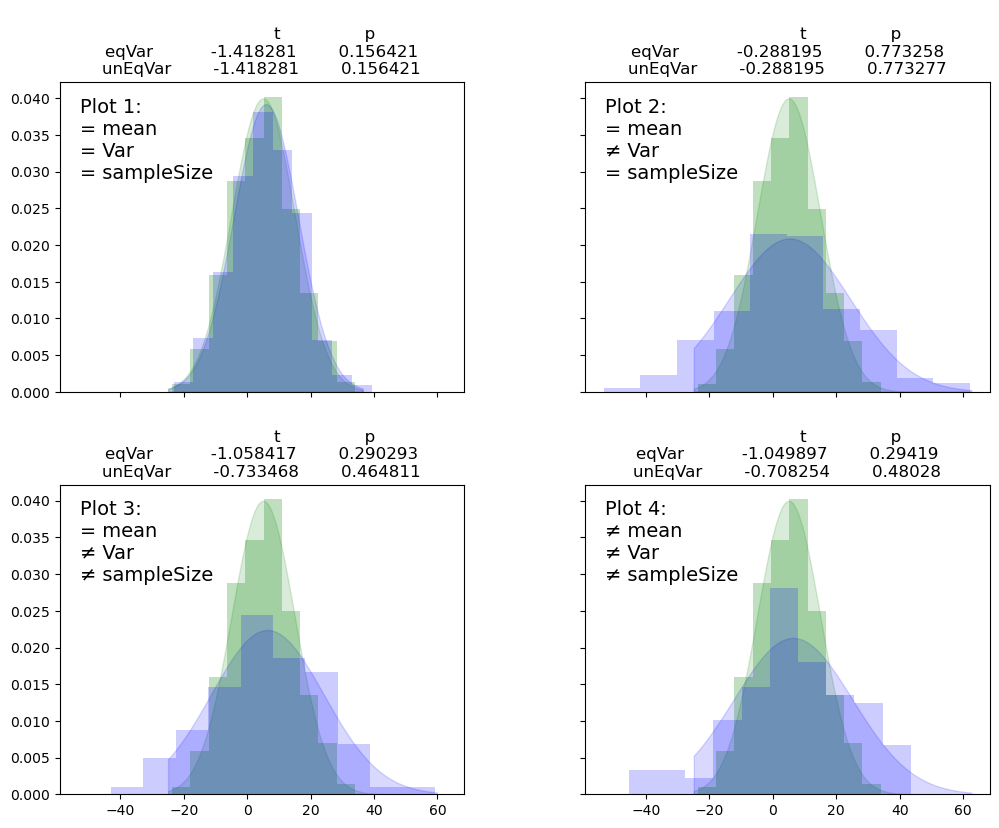

In [4]:
# Construct new Generator and store in rng variable
rng = np.random.default_rng(100)

# store all combinations of normal distributions from examples in documentation
rvs1 = ss.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = ss.norm.rvs(loc=5, scale=10, size=500, random_state=rng) 
rvs3 = ss.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
rvs4 = ss.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
rvs5 = ss.norm.rvs(loc=8, scale=20, size=100, random_state=rng)

plot_list = [(rvs1, rvs2), (rvs1, rvs3), (rvs1, rvs4), (rvs1, rvs5)]
plot_labels = ['Plot 1:\n= mean\n= Var\n= sampleSize', 'Plot 2:\n= mean\n≠ Var\n= sampleSize', 
               'Plot 3:\n= mean\n≠ Var\n≠ sampleSize', 'Plot 4:\n≠ mean\n≠ Var\n≠ sampleSize']

# generate figure with 2 rows & 2 cols
fig, axex = plt.subplots(2, 2, sharex=True, sharey=True, figsize = (12, 8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3, top = 1)  

# generate 2d (2 x 2) array  
arr = np.arange(8).reshape(2, 2, 2)

# iterate over 2d array and return tuple of indices and a count on the index
for count, idx in enumerate(np.ndindex(arr.shape[:2])):
    plot_hist_multi(idx, plot_list[count], plot_labels[count])   

Lets breakdown the results of the 4 plotting examples above where the calculated t-statistic and p-value are calculated using the orginal t-test (donted via eqVar) and Welch's method (denoted via unEqVar) that doesn't assume equal variance. Plot 1 shows the same t-statistic and p-value for both methods which makes sense as the variance of both distributions tested are equal so the assumption made by original t-test holds strong. However on the other-hand we can see how the eqVar t-test underestimates p when the sample distributions have unequal variance (plot 2, 3 and 4). From analysis of Plot 3 we can see how the t-statistic result differs between the methods used when the samplesize is different.

<br>

Lets evaluate what the t-statistic and p-values mean under our null hypothesis that the distributions tested in a given plot have equal means. In all plots we have a p-value <0.05 (pre-defined cut off point) which means we fail to reject the null hypothesis that the distributions means are equal. One would expect plot 4 to have the highest t-statistic as this value increases as the sample mean difference increases. One would also expect plot 4 to have the lowest p-value as we deviate away from the null hypothesis. To further investigate this lets see if the sample size playing a factor here and re-run plot 4 t-test with increased sample sizes, each of the same size.

In [5]:
rvs1a = ss.norm.rvs(loc=5, scale=10, size=1000, random_state=rng)
rvs5a = ss.norm.rvs(loc=8, scale=20, size=1000, random_state=rng)
ss.ttest_ind(rvs1a, rvs5a, equal_var= False)

Ttest_indResult(statistic=-4.943582087364924, pvalue=8.548731388512727e-07)

We can see the expected increase in the asbolute t-statistic and decrease in p-value. An absolute t-statistic of > 2 lies out in the tail of the t-distribution and the tiny p-value observed tells us that if the null hypothesis were true (means of samples same) there would be a very low chance of us making this observation therefore giving us confidence that our result is signifcant. We can thereforce reject our null hypothesis and accept the alternative hypothesis that the means are different.

### Maximise p-value accuracy
Although it doesn't always make a large difference we can generate our own t-distribution to get the corresponding p-value. This method bypasses the theoretical t-distrubtion assuptions made when permutations is left at zero. We can see below that the distributions tested in plot 4 were re-tested while declaring 100000 permutations. The p-value obtained is very similar to the results of plot 4, suggesting that the theoretical t-distrubtion was v close to the actual distribution used in the calculation below.

In [6]:
ss.ttest_ind(rvs1, rvs5, permutations = 100000, random_state=rng)

Ttest_indResult(statistic=-1.0498968632018981, pvalue=0.2931)

### Minimize outliers

Declaring a trim ratio to reduce the impact of outliars, rejecting some data whose values lie at the tail ends of the distribution. If we look below we can the a reduction in the t-statistic as an outlier was removed from the data and the means therefore alligned more.

In [7]:
a1 = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

print("non-trimmed result: ",ss.ttest_ind(a, b))
print("trimmed result: ", ss.ttest_ind(a1, b, trim=0.2))

non-trimmed result:  Ttest_indResult(statistic=1.099305186099593, pvalue=0.30361296704535845)
trimmed result:  Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)



<br>

<h3>References:</h3>

[1]. Wikipedia, available at:
[Ref Link](https://en.wikipedia.org/wiki/Student%27s_t-distribution) (Viewed 14 October 2022).

[2]. Mahima, S, 2021, A complete guide to the T-test, one of the Hypothesis tests, available at:
[Ref Link](https://medium.com/geekculture/a-complete-guide-to-the-t-test-one-of-the-hypothesis-tests-6a72d741957e) (Viewed 14 October 2022).

[3] Lakens, D, 2017, The 20% Statistician [Ref link](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html#:~:text=Take%20home%20message%20of%20this,sizes%20and%20variances%20are%20equal.) (Viewed 16 October 2022).
